Please run the following cell to have the proper styling for the notebook.

In [1]:
%%html
<style>
#notebook-container { 
    width: 50% !important; 
    min-width: 800px;
    padding-right: 5em !important;
}
h1 { margin-top: 3em !important; }
h2 { margin-top: 2em !important; }
h3 { margin-top: 1em !important; }
div.task {
  font-size: 1.2em;
  padding: .7em;
  border: 2px solid #ccc;
  background-color: #eee;
  border-radius: 5px;
  margin: 0.5em 0px;
  display: flex;
}
div.task div:first-child {
    padding-right: 10px;
    font-size: 1.2em;
    line-height: 1.1em;
    color: #777;
}
div.task tt {
    background-color: #fff;
    font-size: 0.9em;
    padding: 0px 5px 0px 5px;
    border-radius: 1px;
}    
div.important, div.warn, div.okay {
    text-align: center;
    font-size: 1.4em;
    padding: .5em;
    border-radius: 1px;    
}
div.warn {
    color: #cc0000;
    border: 4px solid #cc3333;
}
div.okay {
    color: #00cc00;
    border: 4px solid #33cc33;
}
</style>

<h2>How do I approach this assignment?</h2>


There are eight tasks in total in this assignment which need to be completed in order to turn this notebook into an exploratory analysis of the provided dataset. Four of these tasks ask you to implement something and come with a test that passes if your solution works as intended. I recommend that you work with a second notebook or a Python IDE to test out your ideas! It also does not harm to write down your ideas on paper first.
If your code does not work as intended, find out why! `print(..)` statements are your best friend to see what is happening.

The remaining four assignments ask you to answer questions in writing. Treat these tasks like you would treat any writing assignment, your intended audience is someone who is interested in your data analysis&mdash;say, a friend who has some background in Python but does not know much about Data Science.

If you are stuck please contact me well ahead of the deadline. I am happy to help, but please figure out <i>why</i> you are stuck and ask me a specific question that will help you.

<h1>Comparing texts: early fantasy and horror</h1>

In this assignment we will compare eight texts written by four different authors:
<a href="https://en.wikipedia.org/wiki/Lewis_Carroll">Lewis Carrol</a>
(1832-1898) as an author of fantasy and children's books;
<a href="https://en.wikipedia.org/wiki/Mary_Shelley">Mary Shelley</a>
(1797-1851) best known as the writer of Frankenstein, one of the most influental works of horror literatur; notable feminist
<a href="https://en.wikipedia.org/wiki/Charlotte_Perkins_Gilman">Charlotte Perkins Gilman</a> (1860-1935) as an author of gothic and utopian fiction;
and <a href="https://en.wikipedia.org/wiki/H._P._Lovecraft">H.P. Lovecraft</a>
(1890-1937) as one of the pioneers of weird fiction and cosmic horror.

The central question we want to answer is the following: 
<div style="font-size: 1.5em; margin: .5em; text-align: center;">
  How similar or dissimilar are these author's choice of words?
</div>

In essence, we want to see whether we can distinguish the authors by comparing which words they used in their respective works. In order to test our methodology, we will also compare works by the same authors: if our analysis shows a large difference there, our methodoloy is maybe not suited to distinguish between authors but only betweent <i>texts</i>.

<h2>Mathematical background</h2>

We will be using the concepts of <i>multi-sets</i> here which
are similar to sets but can contain any element <i>multiple</i> times. For example, $\{1,1,2,3,5,5,5\}$ is a multi-set in which $1$ is contained twice and $5$ three times.

The number of time an element $s$ occurs in a multi-set $X$ is called the <i>multiplicity</i>
and we write it as $\#_s(X)$. Using the above example,

$$
  \#_1( \{1,1,2,3,5,5,5\} ) = 2, \quad \#_2( \{1,1,2,3,5,5,5\} ) = 1,
  \quad \#_5( \{1,1,2,3,5,5,5\} ) = 3.
$$

The multiplicity of an element that is not contained in a multi-set is simply zero:

$$
  \#_6( \{1,1,2,3,5,5,5\} ) = 0
$$

The <i>cardinality</i> of a multiset is the number of elements that appear in it, including
multiplicities:

$$
  |A| := \sum_{s \in A} \#_s(A)
$$

Here we understand $s \in A$ as the question of whether $s$ is contained <i>at least once</i>
in $A$. To give some examples, the cardinality of $\{1,1,2,3,5,5,5\}$ is $7$ and the cardinality
of $\{a,a,a\}$ is three.


The definition of intersection and union between multiset is best expressed via
multiplicities. Let $A$ and $B$ be two multisets and $s$ a (potential) element
of these sets. Then

$$
  \#_s(A \cap B) = \min( \#_s(A), \#_s(B) )
$$

In words: the number of time $s$ occurs in $A \cap B$ is calculate as the minimum
between the number of times it appears in $A$ and the number of times it appears in $B$.
For example:

$$
   \{ a, b, b, c, d \} \cap \{ b, c, c, d, d \} = \{ b, c, d \}.
$$

Notice that if our two multi-sets happen to be sets (so no member appears more than once), then
this definition of the intersection agrees with the intersection between sets.

The union of two multi-sets is defined as 

$$
  \#_s(A \cup B) = \max( \#_s(A), \#_s(B) ),
$$
 
meaning that an element $s$ occurs as many times as is the maximum number of
occurrences in $A$ and $B$. For example:

$$
   \{ a, b, b, c, d \} \cup \{ b, c, c, d, d \} = \{ a, b, b, c, c, d, d \}.
$$


In Python multi-sets are best represented as the `Counter` data
structure from the `collections` package. Recall that a `Counter`
associates a number (`int` or `float`) with hashable keys (like
strings, numbers, etc.).


<div class="task">
    <div>1)</div>
    <div>
        The <tt>Counter</tt> data structure, similar to <tt>set</tt>, 
        supports the operators <tt>&</tt> and <tt>|</tt>. Research 
        online what these two operators do, e.g., for counters 
        <tt>cA</tt> and <tt>cB</tt>, what is contained in 
        <tt>cA & cB</tt> adn <tt>cA | cB</tt>? Use your own words and keep it short!
    </div>
</div>

Hint: A good starting point are the <a href="https://docs.python.org/3.7/library/collections.html#collections.Counter">Python docs</a>.

<h1><div style="text-align: center">Q1: Multiset - Intersection and Union:</div></h1>
<h2><div style="text-align: left">1. Intersection:</div></h2>
<div style="text-align: left">'Intersection' in set theory means <b>AND</b>, and will produce a result of all elements that are in all sets.  In the case of a multiset it will produce a result showing the <b>MIN</b> of each element, for instance, if there are 2 'a' in cA and 1 'a' in cB it would state 'a':1. Any elements that are in one set but not the other will not be included in an intersection.</div>
<h2><div style="text-align: left">2. Union:</div></h2>
<div style="text-align: left">'Union' in set theory means <b>OR</b>, and will produce a result of all elements in either set.  In the case of a multiset it will produce a result showing the <b>MAX</b> of each element, for instance, if there are 2 'a' in cA and 1 'a' in cB it would state 'a':2. Any elements that are in one set but not the other will still be included in a union.</div>


<div class="task">
    <div>2)</div>
    <div>
        We will use <tt>Counter</tt> to represent multi-sets in Python. Complete
        the method <tt>len_multi(...)</tt> in the cell below to compute the multi-set cardinality
        for the argument <tt>multiA</tt> of type <tt>Counter</tt>.
    </div>
</div>

Hint 1: `len(...)` of a `Counter` returns the number of keys, that is, the number of 
distinct elements in the set, it does not account for their multiplicity.

Hint 2: The multiplicities in a `Counter` `multiA` can either be accessed for each element 
using the index notation `multiA[...]` or we can retrieve all of them at once using
the `.values()` method.

In [2]:
def len_multi(multiA):
    return(sum(multiA.values()))

<div class="important">Your code <b>must</b> pass the following test.</div>

In [3]:
from IPython.core.display import HTML
from collections import Counter
try:
    assert len_multi(Counter('aabbcc')) == 6
    assert len_multi(Counter('aaa')) == 3
    assert len_multi(Counter()) == 0
    display(HTML('<div class="okay">All tests passed!</div>'))
except AssertionError:
    display(HTML('<div class="warn">Not all tests passed</div>'))
    raise

<h2>Parsing text data</h2>

You should find eight .txt files in the `resources-01` directory. To list them, we can use the excellent `glob` library and the `os.path`library can help us to extract the filename:

In [4]:
import glob, os

for filename in glob.glob('./resources-01/*.txt'):
    print(os.path.split(filename)[-1], " with path", filename, )

carroll-alice-wonderland.txt  with path ./resources-01\carroll-alice-wonderland.txt
carroll-looking-glass.txt  with path ./resources-01\carroll-looking-glass.txt
gilman-herland.txt  with path ./resources-01\gilman-herland.txt
gilman-yellow-wallpaper.txt  with path ./resources-01\gilman-yellow-wallpaper.txt
kafka-metamorphosis.txt  with path ./resources-01\kafka-metamorphosis.txt
kafka-the-trial.txt  with path ./resources-01\kafka-the-trial.txt
lovecraft-dunwich-horror.txt  with path ./resources-01\lovecraft-dunwich-horror.txt
lovecraft-shunned-house.txt  with path ./resources-01\lovecraft-shunned-house.txt
shelley-frankenstein.txt  with path ./resources-01\shelley-frankenstein.txt
shelley-last-man.txt  with path ./resources-01\shelley-last-man.txt


You should take a look at some of these file in your favourite text editor.
All texts were retrieved from <a href="https://www.gutenberg.org/">Project Gutenberg</a>, a great resource for public domain texts. 

Let's say we want to read the file <tt>./data/kafka-metamorphosis.txt</tt> and collect all words of Kafka's Metamorphosis in a `Counter`, that is, we want to know for each word how often it appeared in the text. 

We are <b>not</b> interested in the various names that appear in the text: characters and places will of course differ between the stories and will not help us to establish (dis)similarity between the authors. For that reason, we will exclude <b>capitalized words</b>.
This will remove some non-names from the text but all alternative methods are far more complex. 

A similar issue arises with very short words: `is`, `in`, `a`, `of` appear very frequently in any text and we cannot gain much information by including them. We will therefore <b>remove all words of length two and one</b>.

<div class="task">
  <div>3)</div>
  <div> 
  Modify the script below such that <tt>parse_text(filename)</tt> 
  returns all the <b>non-capitalized</b> words of length <b>at least three</b>
  contained in the file <tt>filename</tt> in a <tt>Counter</tt>. 
  Your code must pass all the tests below.
    </div>
</div>

Hint 1: To test whether a <b>single character</b> is capitalized,
you can use the method `.isupper()`.

Hint 2: The remainder of the analysis will work better if you <b>remove punctuation</b> from the words.

In [5]:
def parse_text(filename):
    import re
    from collections import Counter
    res = Counter()
    res1 = []
    with open(filename, encoding="utf8") as f:
        for l in f:
            l = l[:-1]
            l = l.split(' ')
            for w in l:
                if re.search("[.;:,\(‘’!\"/\?'ï»¿']", w): #ignores all punctiation
                    pass
                elif len(w) <3:   #ignores all words less than 3 in length
                    pass
                elif w[0].isupper():#ignores all words beginning with a Capital
                    pass
                else:
                    res1.append(w) #adds word to list res1
    res = Counter(res1)#creates the counter
    return res

len_multi(Counter(parse_text('./resources-01/kafka-metamorphosis.txt')))
            # Split `l` into words and increase their respective count in `res`

14740

<div class="important">Your code <b>must</b> pass the following test.</div>

In [6]:
from IPython.core.display import HTML
import re
from collections import Counter
try:
    text = parse_text('./resources-01/kafka-metamorphosis.txt')
    assert len(text) > 2000, "Did not extract enough words"
    assert 'sister' in text

    text = parse_text('./resources-01/shelley-frankenstein.txt')
    assert len(text) > 6000, "Did not extract enough words"
    assert 'monster' in text

    text = parse_text('./resources-01/carroll-alice-wonderland.txt')
    assert len(text) > 2000, "Did not extract enough words"
    assert 'hatters' in text            #Note, I changed this to hatters as 'hatter' is not in the book
    assert 'tea' in text                
    assert 'rabbit' in text
    display(HTML('<div class="okay">All tests passed!</div>'))
except AssertionError:
    display(HTML('<div class="warn">Not all tests passed</div>'))
    raise

<h2>Bag-of-words</h2>

With our method `parse_text` we can now produce what is often called a &ldquo;bag-of-words&rdquo; from text, that is, a <i>multi-set</i> that contains all words that occur in ot. While we lose the structure of the text (the order of words), this very simple representation already enables us to analyse and compare texts.

We learned in the lecture that the <a href="https://en.wikipedia.org/wiki/Jaccard_index">Jaccard index</a> is a useful method of comparing two sets. As a reminder, it is defined as 
$$
  J(A,B) = \frac{|A \cap B|}{|A \cup B|}.
$$

and as $J(\emptyset, \emptyset) = 1$ for the special case when both inputs are the empty set.

The Jaccard similarity for <i>multi-sets</i> is defined exactly the same way, but we are 
using the intersection, union, and cardinality of multi-sets! 

<div class="task">
  <div>3)</div>
  <div> 
       Complete the method <tt>jaccard_multi(multiA, multiB)</tt> in the next cell
       such that it returns the Jaccard index for the two input sets.
       Your code should pass all the tests below.
    </div>
</div>

Hint: Use the function `len_multi` you implemented earlier!

In [7]:
def jaccard_multi(setA, setB):
    multiUnion = len_multi((setA&(setB)))# creates the union of the two multi-sets
    multiIntersection = len_multi((setA|(setB)))#creates the intersection of the multi-sets
    if multiUnion == 0:
        if multiIntersection == 0:
            jacMulti = 1
        else:
            jacMulti = 0
    else:
        jacMulti = multiUnion/multiIntersection
    return jacMulti   

<div class="important">Your code <b>must</b> pass the following test.</div>

In [8]:
from IPython.core.display import HTML
try:
    assert jaccard_multi( Counter('a'), Counter('b') ) == 0
    assert jaccard_multi( Counter('aa'), Counter('a') ) == 1/2
    assert jaccard_multi( Counter('aaa'), Counter('a') ) == 1/3
    assert jaccard_multi( Counter('aaaa'), Counter('aa') ) == 1/2
    assert jaccard_multi( Counter('aabb'), Counter('aabb') ) == 1
    assert jaccard_multi( Counter(), Counter() ) == 1    
    display(HTML('<div class="okay">All tests passed!</div>'))
except AssertionError:
    display(HTML('<div class="warn">Not all tests passed</div>'))
    raise

<h2>Bag-of-words for all the texts</h2>

We are now ready to import all the eight texts into bag-of-words.

In [9]:
import glob, os, re
from collections import Counter

# Load word count for texts
texts = {}
for filename in glob.glob('./resources-01/*.txt'):
    name = os.path.splitext(os.path.split(filename)[-1])[0]
    texts[name] = parse_text(filename)
    
# Output total number of words
for key in texts:
    print("Loaded {} words from {}".format(len_multi(texts[key]),key) )

Loaded 14562 words from carroll-alice-wonderland
Loaded 15528 words from carroll-looking-glass
Loaded 31007 words from gilman-herland
Loaded 3434 words from gilman-yellow-wallpaper
Loaded 14740 words from kafka-metamorphosis
Loaded 51867 words from kafka-the-trial
Loaded 11053 words from lovecraft-dunwich-horror
Loaded 7023 words from lovecraft-shunned-house
Loaded 46345 words from shelley-frankenstein
Loaded 107828 words from shelley-last-man


And we can see the most common words used in those texts using the `.most_common(...)` method of `Counter`:

In [10]:
display(texts["shelley-frankenstein"].most_common(5))
display(texts["kafka-metamorphosis"].most_common(5))
display(texts["gilman-herland"].most_common(5))

[('the', 3898), ('and', 2904), ('was', 992), ('that', 974), ('had', 679)]

[('the', 1095), ('and', 598), ('his', 524), ('was', 394), ('had', 346)]

[('the', 1768), ('and', 1612), ('was', 692), ('that', 618), ('had', 508)]

Unsurprisingly, the most common words of both authors are simply the highly common words of the English language. But we also note a potential issue here: the number of times the word `the` appears in a text is simply a question of how <i>long</i> the text is. If we simply apply our multi-set jaccard similarity to these sets, this would factor into the result, and very significantly!

As a remedy we will <i>normalize</i> the bag-of-words to make their comparison more meaningful. We have not really defined what a multiset with non-integral membership is, but the Jaccard index you programmed earlier will work just as intended.

<div class="task">
  <div>4)</div>
  <div> 
       Complete the code below to normalize the `Counters` by the multiplicity 
       of the most frequent word.
    </div>
</div>

In [11]:
for key, multi in texts.items():
    norm = texts[key].most_common(1)[0][1]
    for w in multi:
        multi[w] /= norm

<div class="important">Your code <b>must</b> pass the following test.</div>

In [12]:
from IPython.core.display import HTML
try:
    assert texts["shelley-frankenstein"].most_common(1)[0][1] == 1.0
    assert texts["lovecraft-shunned-house"].most_common(1)[0][1] == 1.0
    display(HTML('<div class="okay">All tests passed!</div>'))
except AssertionError:
    display(HTML('<div class="warn">Not all tests passed</div>'))
    raise

Finally, with all your hard work, we can look at a pairwise comparison between the texts!
The following code will create a <i>similarity matrix</i>: a table which contains all pairwise Jaccard similarities.

In [13]:
from itertools import combinations
from collections import defaultdict

import pandas as pd

M = defaultdict(dict)
for authorA, authorB in combinations(texts.keys(), 2):
    index = jaccard_multi(texts[authorA], texts[authorB])
    M[authorA][authorB] = M[authorB][authorA] = index

for author in texts:
    M[author][author] = 1

df = pd.DataFrame.from_dict(M)
df = df.sort_index()
df = df.reindex(sorted(df.columns), axis=1)

df

,carroll-alice-wonderland,carroll-looking-glass,gilman-herland,gilman-yellow-wallpaper,kafka-metamorphosis,kafka-the-trial,lovecraft-dunwich-horror,lovecraft-shunned-house,shelley-frankenstein,shelley-last-man
carroll-alice-wonderland,1.000000,0.627783,0.359471,0.353455,0.406702,0.461074,0.374889,0.325494,0.356759,0.378196
carroll-looking-glass,0.627783,1.000000,0.368433,0.360761,0.411296,0.464157,0.353193,0.309754,0.346980,0.366846
gilman-herland,0.359471,0.368433,1.000000,0.366218,0.392234,0.411220,0.300193,0.285790,0.379343,0.343997
gilman-yellow-wallpaper,0.353455,0.360761,0.366218,1.000000,0.336761,0.365384,0.258734,0.243054,0.301647,0.263697
kafka-metamorphosis,0.406702,0.411296,0.392234,0.336761,1.000000,0.539862,0.322583,0.301094,0.365036,0.356427
kafka-the-trial,0.461074,0.464157,0.411220,0.365384,0.539862,1.000000,0.359404,0.323152,0.403504,0.383928
lovecraft-dunwich-horror,0.374889,0.353193,0.300193,0.258734,0.322583,0.359404,1.000000,0.410800,0.364470,0.394956
lovecraft-shunned-house,0.325494,0.309754,0.285790,0.243054,0.301094,0.323152,0.410800,1.000000,0.371058,0.384274
shelley-frankenstein,0.356759,0.346980,0.379343,0.301647,0.365036,0.403504,0.364470,0.371058,1.000000,0.554588
shelley-last-man,0.378196,0.366846,0.343997,0.263697,0.356427,0.383928,0.394956,0.384274,0.554588,1.000000


If you would like to see a visualization of the above matrix in form of a <i>heatmap</i>
install the seaborn library via `pip install seaborn --user` (or `pip3 install seaborn --user`, depending on your system). 

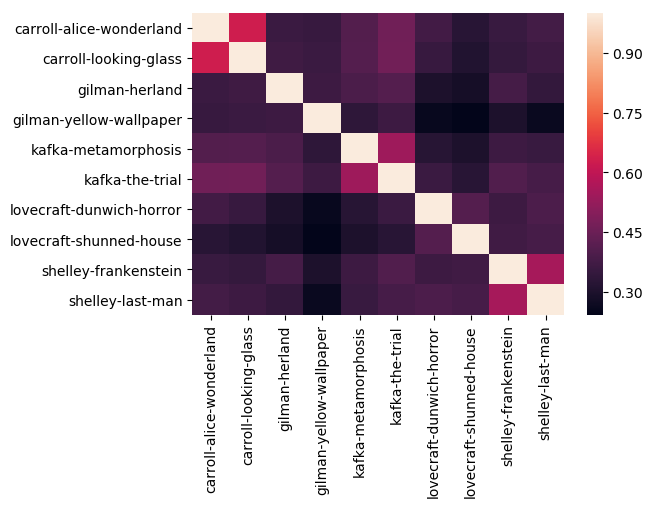

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(dpi=100)
sns.heatmap(df)
pass

<h2>Interpreting the result</h2>

Our data analysis would not be complete without a final analysis of our findings!
Answer the following questions in writing. Explain briefly how you came to your conclusion. 

<div class="task">
  <div>5)</div>
  <div> 
      Which pair of distinct texts is <b>most similar</b> according to your analysis?
    </div>
</div>

<div style="text-align: center; margin: 3em">Lewis Carroll's <i>'Alice in Wonderland'</i> and <i>'Through the Looking Glass'</i> with a Jaccard Index of 0.607.</div>
<div style="text-align: center; margin: 3em">The most similar two texts by different authors is Franz Kafka's <i>'The Trial'</i> and Lewis Carroll's<i>'Through the Looking Glass'</i> with a Jaccard Index of 0.451954.</div>

<div class="task">
  <div>6)</div>
  <div> 
      Which pair of texts is <b>most dissimilar</b> according to your analysis?
    </div>
</div>

<div style="text-align: center; margin: 3em">H.P. Lovecraft's <i>'The Shunned House'</i> and Charlotte Perkins Gilman's <i>'The Yellow Wallpaper'</i> with a Jaccard Index of 0.238.</div>

<div class="task">
  <div>7)</div>
  <div> 
      Which <b>author</b> has the highest similarity between their two respective texts?
    </div>
</div>

<div style="text-align: center; margin: 3em">Lewis Carroll</div>

As always with exploratory data analysis, we need to think about what we could potentially do better.

<div class="task">
  <div>8)</div>
  <div> 
      Propose <b>three</b> ways in which you think this data analysis could be changed 
      to improve it. Provide a rough sketch of what change you would apply and how you 
      think it will change the outcome of the analysis.    
  </div>
</div>

<div style="text-align: left"><h3>1: Remove common words:</h3></div>
I propose removing the (25-30) most common words, as these would be in every english language book.  My college text books could have some similarity to J.R.R. Tolkien's vast books using the surrent system, but they only really share the english language.
<div style="text-align: left"><h3>2: Sentence length:</h3></div>
I propose iterating through the texts and creating a multi-set of all sentence lengths.  This will assess how descriptive an author is, or isn't.  A Jaccard index of this could be combined with the current one and converted to an average/mean
<div style="text-align: left"><h3>3: Non-dictionary words:</h3></div>
I propose calculating a ratio of the amount of non-dictionary words to dictionary words.  The reason for this is that books that are of a fantasy/sci-fi nature tend to have many words created by the author and would be considered similar to other authors books, but not have that many similar words.  Take the Harry Potter and Discworld series as an example.  This would need access to a english dictionary so may not be very practical.